In [20]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.layers import Dropout, Dense, MaxPooling2D, Conv2D, Flatten, Input
from keras.optimizers import SGD
from keras.models import Sequential
from keras.preprocessing.image import ImageDataGenerator
import os
print(os.listdir("../input/cell_images/cell_images/"))

['Uninfected', 'Parasitized']


In [28]:
model = Sequential()

#Add one Layer of the CNN
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(64, 64, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#Add the second one
model.add(Conv2D(32, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

#Flatten and then feed it to the Dense Layer
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))

#Compile the CNN
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 6272)              0         
_________________________________________________________________
dense_13 (Dense)             (None, 128)               802944    
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
__________

In [29]:
train_data = ImageDataGenerator(validation_split=0.3, rescale=1./255, shear_range=0.2, 
                                zoom_range=0.2, horizontal_flip=True, vertical_flip=True)

In [30]:
train_set = train_data.flow_from_directory("../input/cell_images/cell_images/", 
                                           target_size=(64, 64), 
                                           batch_size=32, class_mode='binary', 
                                           subset='training')

Found 19292 images belonging to 2 classes.


In [31]:
test_set = train_data.flow_from_directory("../input/cell_images/cell_images/", 
                                          target_size=(64, 64),
                                          batch_size=32, class_mode='binary', 
                                          subset='validation')

Found 8266 images belonging to 2 classes.


In [32]:
model.fit_generator(train_set, steps_per_epoch=345, epochs=10, 
          validation_data=test_set, validation_steps=86)

Epoch 1/10
345/345 [==============================] - 60s 173ms/step - loss: 0.5939 - acc: 0.6803 - val_loss: 0.4019 - val_acc: 0.8608
Epoch 2/10
345/345 [==============================] - 52s 150ms/step - loss: 0.2766 - acc: 0.8989 - val_loss: 0.2257 - val_acc: 0.8964
Epoch 3/10
345/345 [==============================] - 40s 116ms/step - loss: 0.2290 - acc: 0.9208 - val_loss: 0.1987 - val_acc: 0.9237
Epoch 4/10
345/345 [==============================] - 36s 105ms/step - loss: 0.2169 - acc: 0.9338 - val_loss: 0.1729 - val_acc: 0.9421
Epoch 5/10
345/345 [==============================] - 36s 105ms/step - loss: 0.2115 - acc: 0.9349 - val_loss: 0.1874 - val_acc: 0.9335
Epoch 6/10
345/345 [==============================] - 37s 107ms/step - loss: 0.1988 - acc: 0.9397 - val_loss: 0.1672 - val_acc: 0.9473
Epoch 7/10
345/345 [==============================] - 37s 109ms/step - loss: 0.1863 - acc: 0.9415 - val_loss: 0.1754 - val_acc: 0.9359
Epoch 8/10
345/345 [==============================] - 3

In [43]:
hist = model.history.history
val_acc = hist['val_acc']
acc = hist['acc']
val_loss = hist['val_loss']
loss = hist['loss']

In [60]:
import matplotlib.pyplot as plt
%matplotlib inline

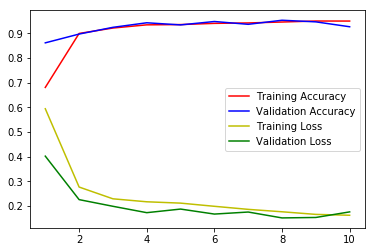

In [64]:
plt.plot(epochs, acc, label='Training Accuracy', color='r')
plt.plot(epochs, val_acc, label='Validation Accuracy', color='b')
plt.plot(epochs, loss, label='Training Loss', color='y')
plt.plot(epochs, val_loss, label='Validation Loss', color='g')
plt.legend()